# Importing Libraries

In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,roc_curve,auc


# Loading Dataset

In [ ]:
#Reading dataset (csv) using panda module
dataset=pd.read_csv('/content/parkinsons.csv')

# Exploratory Data Analysis

In [ ]:
dataset.shape

(195, 24)

In [ ]:
#Printing inital 5 rows
dataset.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
#dropping irrelevant columns
dataset = dataset.drop('name', axis=1)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

1. MDVP:Fo(Hz): Fundamental frequency of vocal fold vibrations (baseline pitch).
2. MDVP:Fhi(Hz): Maximum fundamental frequency observed.
3. MDVP:Flo(Hz): Minimum fundamental frequency observed.
4. MDVP:Jitter(%): Percentage variation in the fundamental frequency (pitch variation).
5. MDVP:Jitter(Abs): Absolute variation in the fundamental frequency.
6. MDVP:RAP - Relative Average Perturbation; measures short-term pitch perturbations.
7. MDVP: Pitch Period Perturbation Quotient; measures longer-term pitch perturbations.
8. Jitter:DDP - Average absolute difference of consecutive periods (double the RAP value).
9. MDVP shimmer: Amplitude variation in voice (amplitude instability).
10. MDVP:Shimmer(dB) measured in decibels.
11.Shimmer:APQ3 - Three-point Amplitude Perturbation Quotient; measures short-term amplitude perturbations.
12. Shimmer:APQ5 - Five-point Amplitude Perturbation Quotient; measures amplitude perturbations over a longer term.
13.MDVP:APQ - Amplitude Perturbation Quotient; measures amplitude variation over multiple periods.
14. Shimmer(DDA): Average absolute difference between consecutive amplitude periods (triple the APQ3 value).
15. NHR: Noise-to-Harmonics Ratio; ratio of noise to tonal components in the voice.
16. HNR: Harmonics-to-Noise Ratio; ratio of harmonics (tone) to noise in the voice.
17. Status: Disease status (Parkinson's disease or healthy).
18. RPDE: Recurrence Period Density Entropy; non-linear dynamic measure of vocal fold signal complexity.
19. DFA: Detrended Fluctuation Analysis; measures the self-similarity in vocal signals.
20. Spread1: First measure of variation in voice frequency distribution.
21. Spread2: Second measure of variation in voice frequency distribution.
22. D2: Correlation dimension; measures the complexity of vocal fold dynamics.
23. PPE: Pitch Period Entropy; quantifies the randomness or irregularity in pitch.

In [ ]:
dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
#Counting target values
dataset['status'].value_counts()


,count
status,
1,147
0,48


In [ ]:
dataset.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


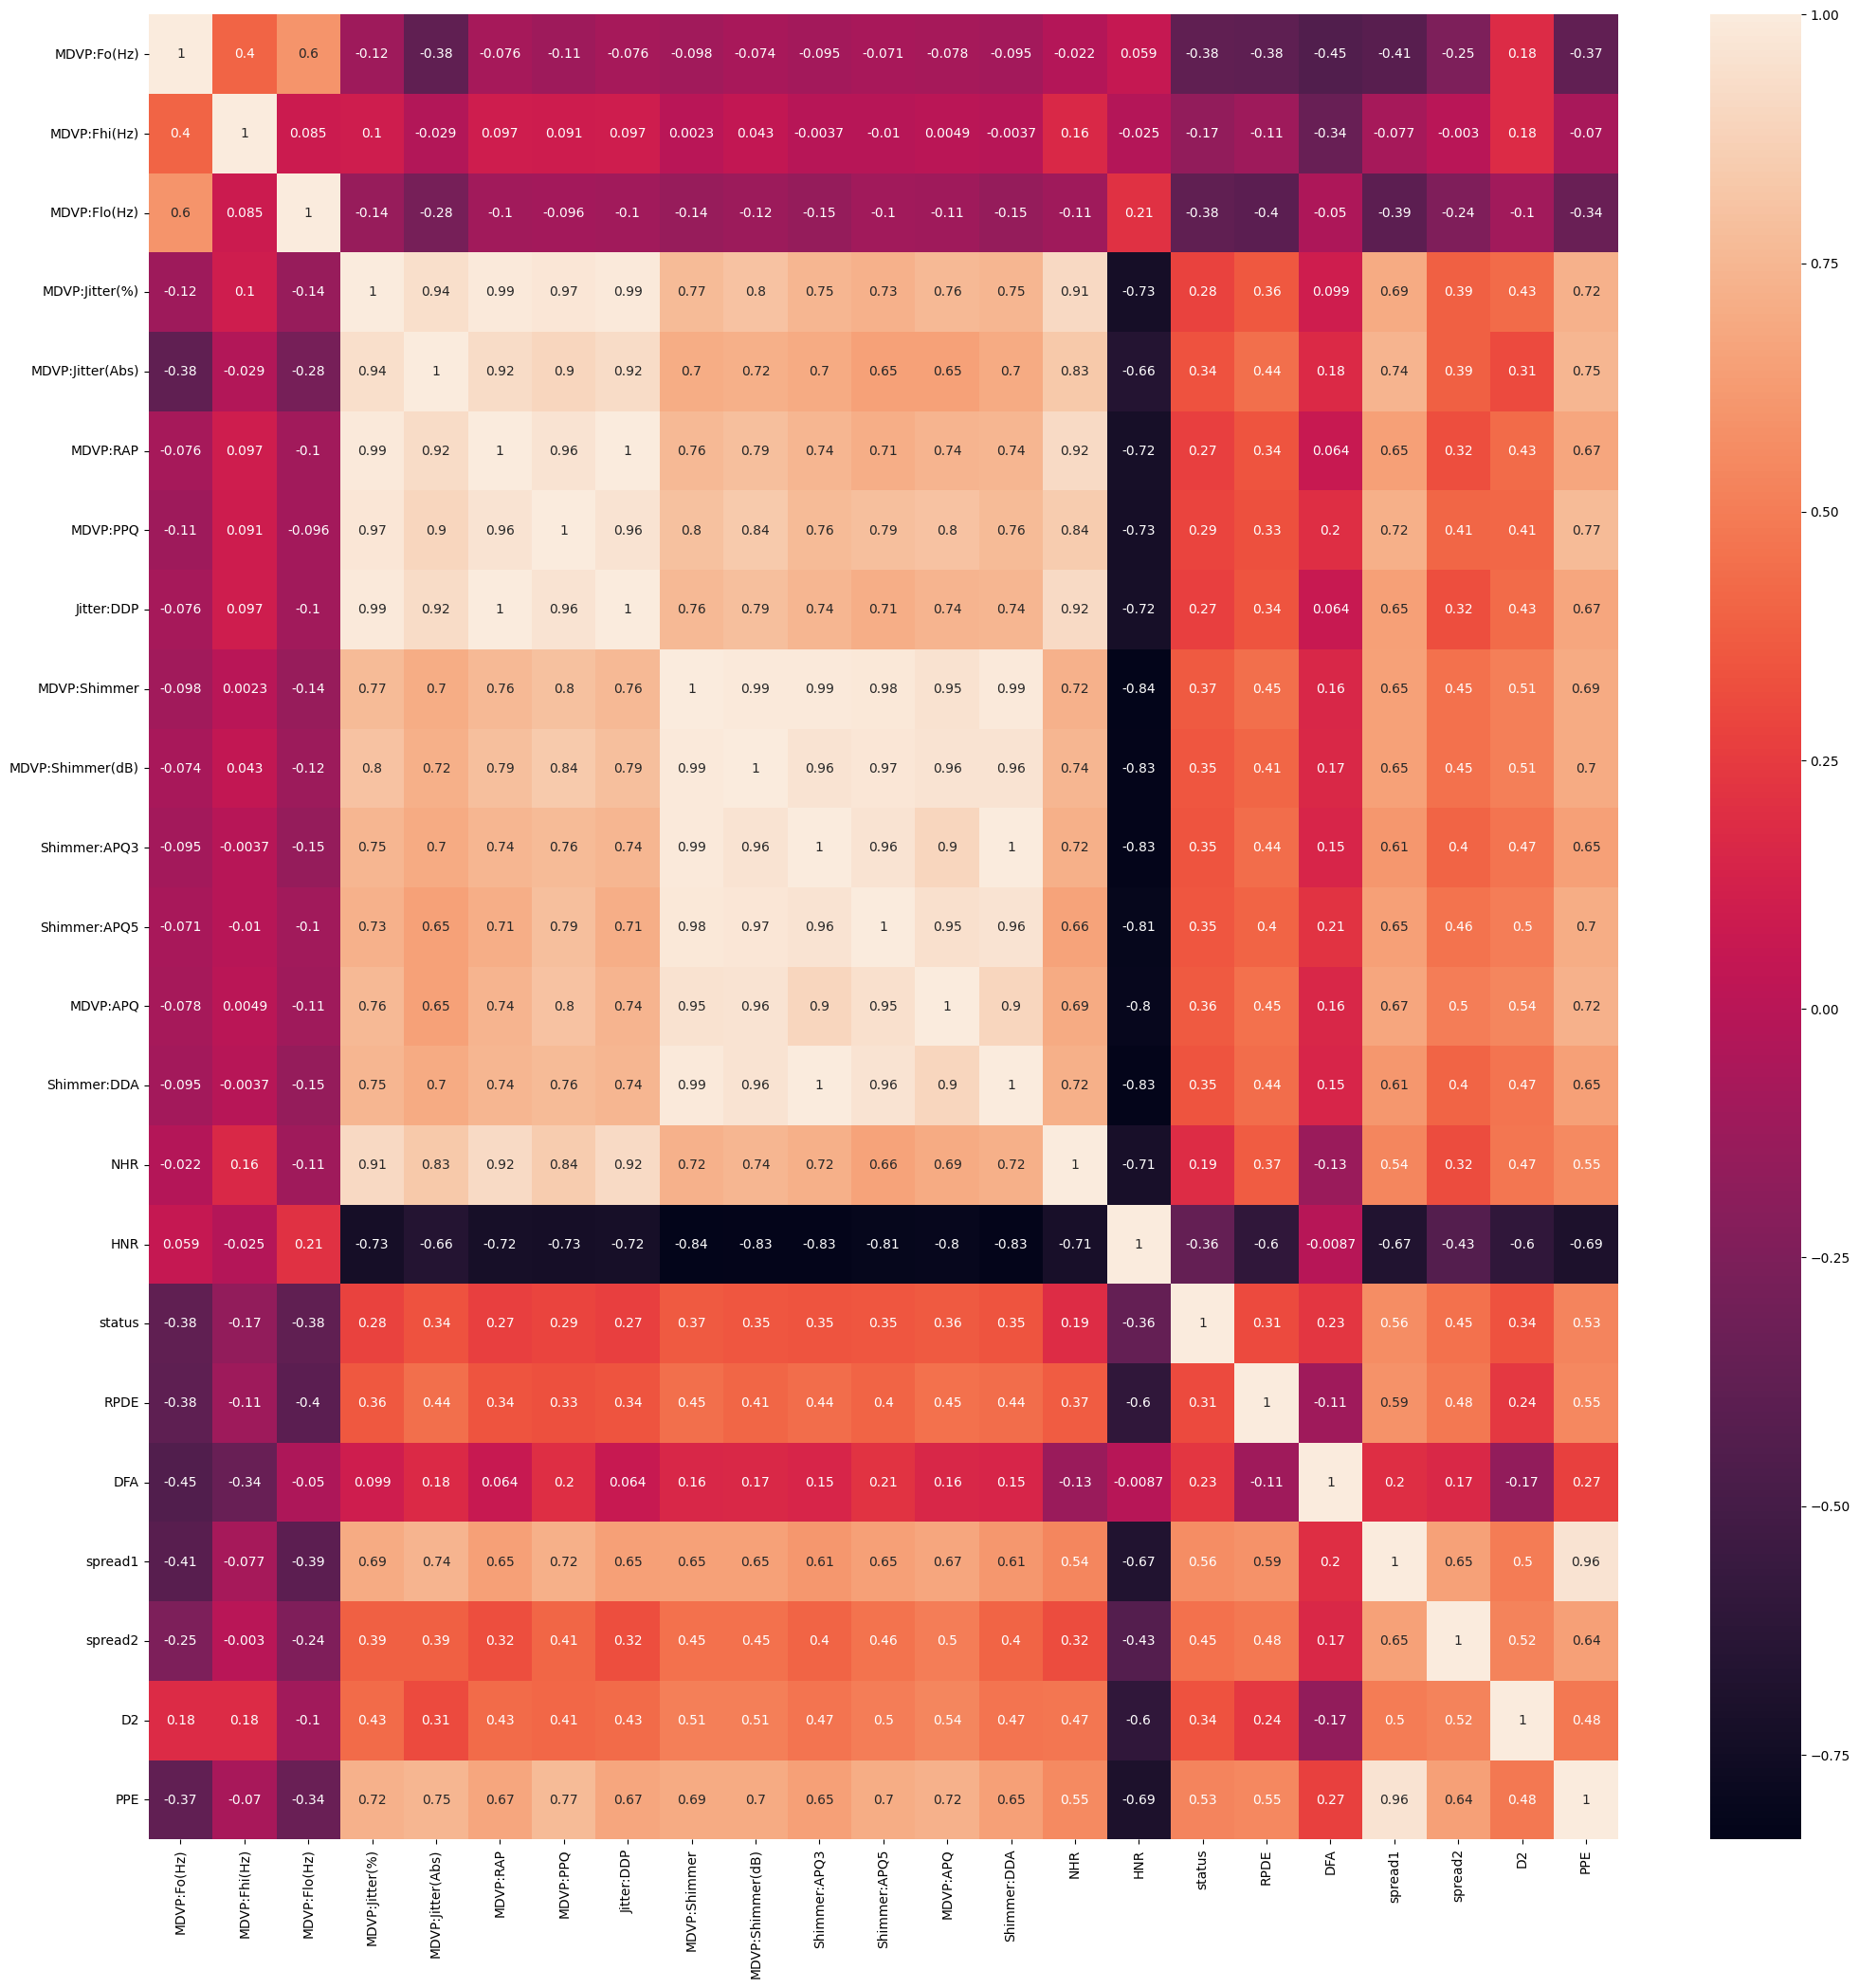

In [ ]:
#Heatmap using seaborn
plt.figure(figsize=(25, 25))
p = sns.heatmap(dataset.corr(), annot=True)

**Spliting the data**

In [ ]:
X = dataset.drop(columns=['status'], axis=1)
Y = dataset['status']

In [ ]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
Y

,status
0,1
1,1
2,1
3,1
4,1
...,...
190,0
191,0
192,0
193,0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


# Data Standardization

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X_train

array([[ 0.63239631, -0.02731081, -0.87985049, ..., -0.97586547,
        -0.55160318,  0.07769494],
       [-1.05512719, -0.83337041, -0.9284778 , ...,  0.3981808 ,
        -0.61014073,  0.39291782],
       [ 0.02996187, -0.29531068, -1.12211107, ..., -0.43937044,
        -0.62849605, -0.50948408],
       ...,
       [-0.9096785 , -0.6637302 , -0.160638  , ...,  1.22001022,
        -0.47404629, -0.2159482 ],
       [-0.35977689,  0.19731822, -0.79063679, ..., -0.17896029,
        -0.47272835,  0.28181221],
       [ 1.01957066,  0.19922317, -0.61914972, ..., -0.716232  ,
         1.23632066, -0.05829386]])

# Model Training

**1. Random Forest Algorithm -**

In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [ ]:
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, random_state=42)

**2. Naive Bayes Algorithm -**

In [ ]:
model2=GaussianNB()

In [ ]:
model2.fit(X_train,Y_train)

GaussianNB()

**3.KNN Algorithm -**

In [ ]:
model3=KNeighborsClassifier()

In [ ]:
model3.fit(X_train,Y_train)

KNeighborsClassifier()

  **4.XGBoost Algorithm-**

In [ ]:
model4=XGBClassifier()

In [ ]:
model4.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Model Evaluation

**1. Random Forest -**

In [ ]:
Y_prediction=model.predict(X_test)

In [ ]:
print(confusion_matrix(Y_test,Y_prediction))

[[ 5  3]
 [ 5 26]]


In [ ]:
accuracy=round(accuracy_score(Y_test,Y_prediction),3)
precision=round(precision_score(Y_test,Y_prediction),3)
recall=round(recall_score(Y_test,Y_prediction),3)

In [ ]:
print("Accuracy is: " + (str(accuracy*100)))
print("Precision is: " + (str(precision*100)))
print("Recall is: " + (str(recall*100)))

Accuracy is: 79.5
Precision is: 89.7
Recall is: 83.89999999999999


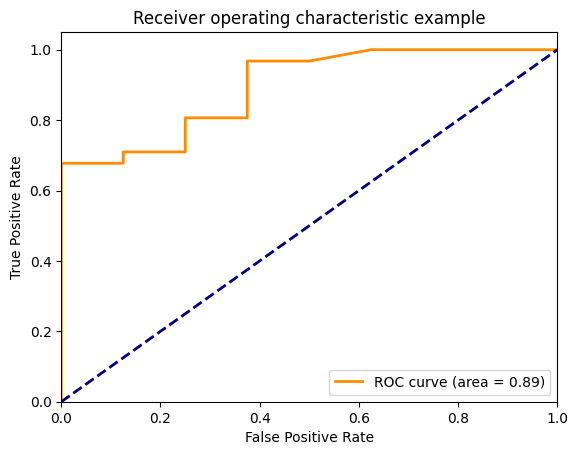

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


**2. Naive Bayes Algorithm -**

In [ ]:
Y_prediction2=model2.predict(X_test)

In [ ]:
print(confusion_matrix(Y_test,Y_prediction2))

[[ 8  0]
 [15 16]]


In [ ]:
accuracy2=round(accuracy_score(Y_test,Y_prediction2),3)
precision2=round(precision_score(Y_test,Y_prediction2),3)
recall2=round(recall_score(Y_test,Y_prediction2),3)

In [ ]:
print("Accuracy is: " + (str(accuracy2*100)))
print("Precision is: " + (str(precision2*100)))
print("Recall is: " + (str(recall2*100)))

Accuracy is: 61.5
Precision is: 100.0
Recall is: 51.6


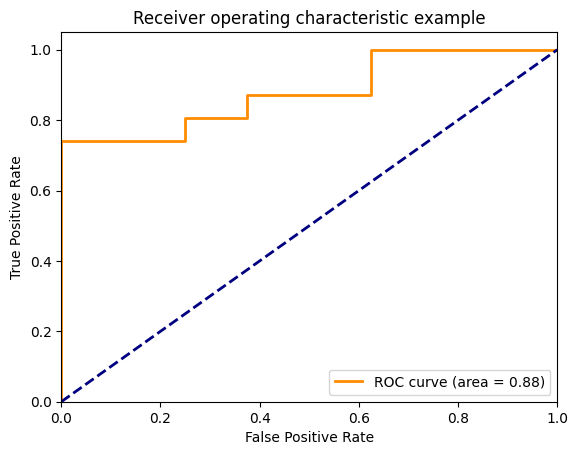

In [ ]:
y_pred_proba = model2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**3.KNN Algorithm -**

In [ ]:
Y_prediction3=model3.predict(X_test)

In [ ]:
print(confusion_matrix(Y_test,Y_prediction3))

[[ 6  2]
 [ 7 24]]


In [ ]:
accuracy3=round(accuracy_score(Y_test,Y_prediction3),3)
precision3=round(precision_score(Y_test,Y_prediction3),3)
recall3=round(recall_score(Y_test,Y_prediction3),3)

In [ ]:
print("Accuracy is: " + (str(accuracy3*100)))
print("Precision is: " + (str(precision3*100)))
print("Recall is: " + (str(recall3*100)))

Accuracy is: 76.9
Precision is: 92.30000000000001
Recall is: 77.4


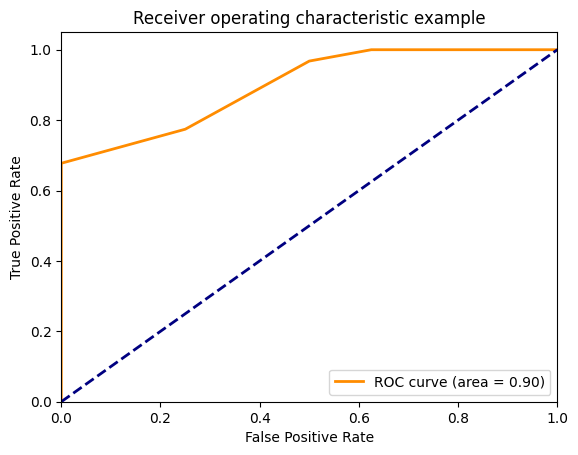

In [ ]:
y_pred_proba = model3.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

  **4.XGBoost Algorithm-**

In [ ]:
Y_prediction4=model4.predict(X_test)

In [ ]:
print(confusion_matrix(Y_test,Y_prediction))

[[ 5  3]
 [ 5 26]]


In [ ]:
accuracy4=round(accuracy_score(Y_test,Y_prediction4),3)
precision4=round(precision_score(Y_test,Y_prediction4),3)
recall4=round(recall_score(Y_test,Y_prediction4),3)

In [ ]:
print("Accuracy is: " + (str(accuracy4*100)))
print("Precision is: " + (str(precision4*100)))
print("Recall is: " + (str(recall4*100)))

Accuracy is: 87.2
Precision is: 96.39999999999999
Recall is: 87.1


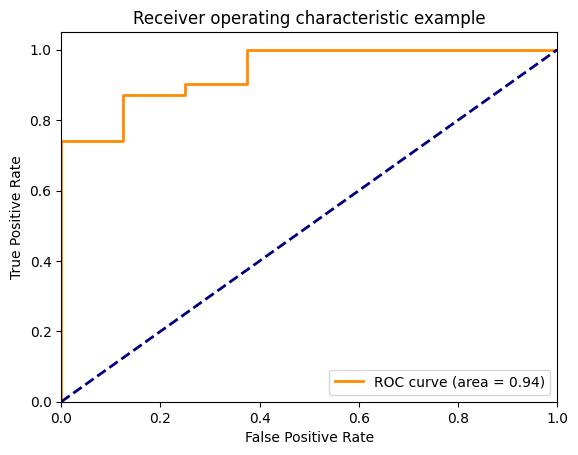

In [ ]:
y_pred_proba = model4.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Comparing evaluation metrics for all models
model_results = {
    "Random Forest": {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,

    },
    "Naive Bayes": {
        "Accuracy": accuracy2,
        "Precision": precision2,
        "Recall": recall2,

    },
    "KNN": {
        "Accuracy": accuracy3,
        "Precision": precision3,
        "Recall": recall3,

    },
    "XGBoost": {
        "Accuracy": accuracy4,
        "Precision": precision4,
        "Recall": recall4,

    }
}

results_df = pd.DataFrame(model_results).transpose()
print(results_df)


               Accuracy  Precision  Recall
Random Forest     0.795      0.897   0.839
Naive Bayes       0.615      1.000   0.516
KNN               0.769      0.923   0.774
XGBoost           0.872      0.964   0.871


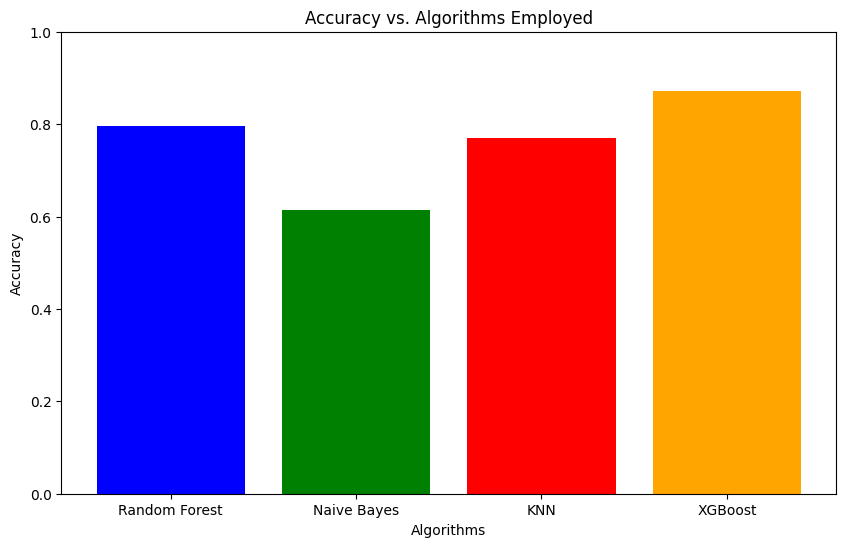

In [ ]:
 #accuracy vs algorithms employed graph

algorithms = results_df.index.tolist()
accuracy_scores = results_df['Accuracy'].tolist()

plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracy_scores, color=['blue', 'green', 'red', 'orange'])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Algorithms Employed")
plt.ylim([0, 1.0])  # Set y-axis limit to 0-1 for accuracy
plt.show()